In [19]:
import os, sys
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [20]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 200

In [21]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

count = 0
for line in open('hin.txt', encoding="utf-8"):
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    input_sentence = line.rstrip().split('\t')[0]
    output = line.rstrip().split('\t')[1]

    output_sentence = output + ' '
    output_sentence_input = ' ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("Number of sample input:", len(input_sentences))
print("Number of sample output:", len(output_sentences))
print("Number of sample output input:", len(output_sentences_inputs))

Number of sample input: 2979
Number of sample output: 2979
Number of sample output input: 2979


In [22]:
print("English sentence: ",input_sentences[180])
print("Hindi translation: ",output_sentences[180])

English sentence:  I'm an atheist.
Hindi translation:  मैं भगवान में यकीन नहीं करता। 


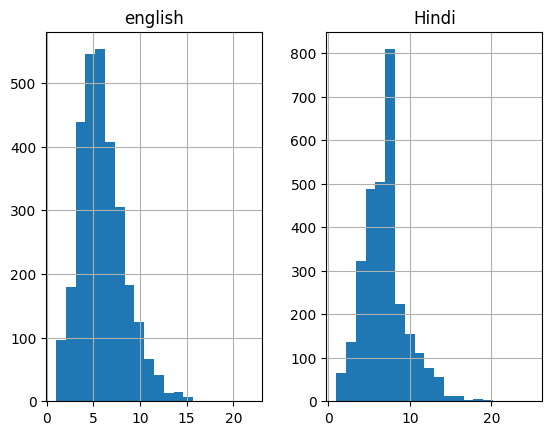

In [23]:
# let’s visualise the length of the sentences.
import pandas as pd

eng_len = []
Hin_len = []

# populate the lists with sentence lengths
for i in input_sentences:
      eng_len.append(len(i.split()))

for i in output_sentences:
      Hin_len.append(len(i.split()))

length_df = pd.DataFrame({'english':eng_len, 'Hindi':Hin_len})

length_df.hist(bins = 20)
plt.show()

In [24]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)
print(input_integer_seq)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)


[[1309], [941], [941], [85], [567], [567], [567], [942], [942], [943], [943], [944], [944], [120, 10], [36, 945], [946], [946], [1310], [26, 947], [1311], [50, 9], [67, 62], [33, 157], [1312], [948], [948], [26, 187], [949], [949], [14, 285], [14, 285], [14, 285], [2, 357], [2, 357], [77, 473], [36, 950], [36, 1313], [173, 33], [174, 13], [403, 358], [474, 13], [1314], [2, 1315], [2, 1316, 102], [2, 568], [36, 240], [36, 240], [36, 709], [36, 286], [36, 175], [47, 287], [139, 324], [95, 260], [95, 260], [95, 260], [95, 260], [710], [403, 569], [50, 27, 9], [1317], [25, 404], [359, 1318], [711, 31], [2, 40, 360], [2, 40, 360], [2, 241, 4], [2, 241, 4], [2, 241, 4], [2, 241, 4], [2, 241, 4], [36, 227], [36, 570], [36, 570], [148, 31, 9], [148, 31, 9], [148, 13, 62], [202, 127], [57, 361], [16, 5, 325], [24, 475], [24, 1319], [176, 149], [176, 149], [571, 16], [25, 712], [25, 712], [7, 572, 43], [228, 573], [38, 20, 4], [38, 20, 4], [38, 20, 4], [38, 20, 4], [38, 20, 4], [38, 20, 4], [38,

In [25]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[180]:", encoder_input_sequences[180])

encoder_input_sequences.shape: (2979, 22)
encoder_input_sequences[180]: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  36  59 953]


In [26]:

print(word2idx_inputs["join"])
print(word2idx_inputs["us"])

587
83


In [66]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[180]:", decoder_input_sequences[100])


decoder_input_sequences.shape: (2979, 10)
decoder_input_sequences[180]: [   4 1553    0    0    0    0    0    0    0    0]


In [86]:
print(word2idx_outputs[""])
print(word2idx_outputs["मोटे मत हो जाना।"])
print(word2idx_outputs["है"])
print(word2idx_outputs["हो जाना।"])


KeyError: ''

In [31]:

decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_output_sequences.shape:", decoder_output_sequences.shape)

decoder_output_sequences.shape: (2979, 10)


In [51]:
from numpy import array, asarray, zeros

embeddings_dictionary = dict()

glove_file = open(r'glove.twitter.27B.200d.txt', encoding="utf8")

for line in glove_file:
    rec = line.split()
    word = rec[0]
    vector_dimensions = asarray(rec[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()


In [52]:

num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [53]:

print(embeddings_dictionary["join"])

[-3.7239e-01  4.7634e-01 -1.9666e-01 -1.1641e+00  1.2820e-02 -4.7063e-01
  4.4522e-01  1.8911e-01  5.6740e-01 -6.1915e-02  2.7159e-01 -1.7613e-01
 -5.4897e-01 -1.6782e-01  3.0910e-01  1.0253e-01  4.3412e-01 -4.0300e-02
  3.4782e-02  2.8017e-01  1.6735e-01 -5.3730e-02 -5.9838e-01 -6.7251e-02
 -7.0371e-01  1.0674e+00  4.1123e-01  2.6227e-01 -3.2041e-01  5.2882e-01
  3.6446e-01  1.3661e-01 -2.2680e-01  6.6556e-01  3.4684e-01 -4.1284e-01
  5.5050e-01  3.5691e-01  3.6985e-01 -3.1312e-01  9.2343e-02  1.7105e-01
 -1.5200e-01  6.4297e-02  2.2327e-01  2.9222e-01 -7.3356e-01 -4.6585e-02
 -2.1011e-01  1.2690e-01  3.1638e-01 -5.1846e-01  2.2601e-02 -1.6426e-01
 -8.4231e-02 -6.5978e-02 -1.4436e-01 -2.2150e-01  4.2886e-01  3.0813e-01
 -1.0191e-03  5.9619e-01  1.7514e-01  5.3788e-01 -6.3198e-01  1.5236e-01
 -1.9268e-01  5.8482e-03  6.8425e-01  5.9576e-01  4.4315e-01  3.5061e-01
  1.8628e-01  8.6317e-01  2.1811e-01 -2.6925e-02  1.4113e-01 -6.5218e-03
 -1.8793e-01 -7.6275e-01 -1.9529e-01 -3.8076e-01  2

In [54]:

print(embedding_matrix[464])

[-3.47270012e-01 -1.19970001e-01 -9.79260027e-01 -2.62629986e-01
  2.92250007e-01 -1.30740002e-01  6.18019998e-01 -8.77430022e-01
 -4.47019994e-01  1.66660007e-02 -5.30130029e-01 -5.07000029e-01
 -4.78370011e-01  8.43050003e-01 -7.36679971e-01 -6.28700018e-01
 -7.43950009e-02 -1.97950006e-02 -8.66819978e-01  3.18480015e-01
  7.32240006e-02  8.56580019e-01 -1.60080001e-01  2.66460001e-01
  6.40859976e-02  1.52110004e+00 -2.11539999e-01  1.27929997e+00
 -9.10860002e-01 -4.61720005e-02 -1.71330005e-01  1.23949997e-01
  4.71299998e-02  2.89660007e-01 -1.15960002e-01 -5.91459982e-02
 -2.71050006e-01 -1.40340000e-01  5.73170006e-01  4.42880005e-01
  4.80800003e-01 -1.51529998e-01 -8.42159986e-01 -1.02810001e+00
 -1.12889998e-01 -3.22519988e-01  5.80980003e-01 -2.74650007e-01
 -7.55760014e-01  3.86229992e-01  3.37769985e-01 -4.08600003e-01
  1.65839996e-02 -8.69050026e-02 -4.35250014e-01  6.65209964e-02
 -5.05840003e-01 -1.82940006e-01 -2.15230003e-01  2.50340015e-01
  1.19589999e-01 -2.00770

In [55]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)


In [56]:
num_words_output = len(word2idx_outputs) + 1

decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)
decoder_targets_one_hot.shape


(2979, 10, 3188)

In [57]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [58]:

encoder_inputs = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [59]:
decoder_inputs = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [60]:

decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [61]:
model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 22)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 22, 200)              481600    ['input_3[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, 10, 256)              816128    ['input_4[0][0]']             
                                                                                            

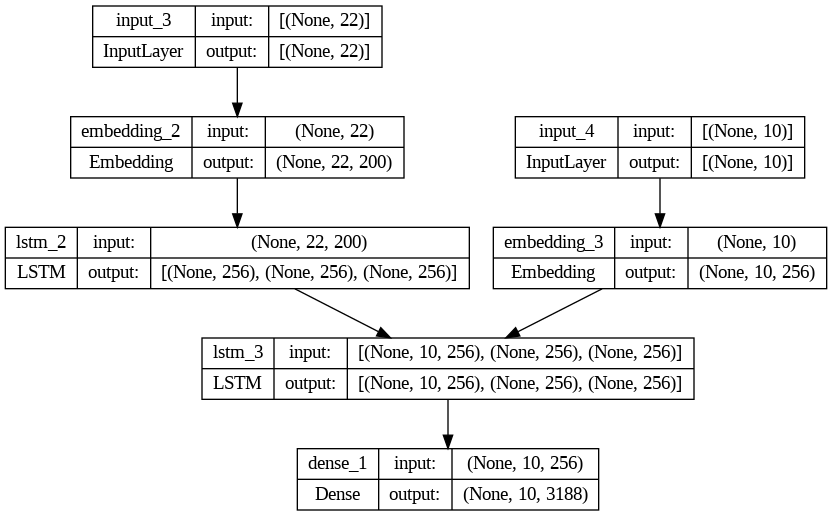

In [62]:
from keras.utils import plot_model
plot_model(model, to_file='download.png', show_shapes=True, show_layer_names=True)

In [63]:

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [73]:
history = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=5,
    callbacks=[es],
    validation_split=0.1,
)


Epoch 1/5
42/42 [==============================] - 13s 300ms/step - loss: 0.2450 - accuracy: 0.9893 - val_loss: 3.0709 - val_accuracy: 0.5876
Epoch 2/5
42/42 [==============================] - 13s 300ms/step - loss: 0.2280 - accuracy: 0.9917 - val_loss: 3.0564 - val_accuracy: 0.5933
Epoch 3/5
42/42 [==============================] - 13s 304ms/step - loss: 0.2124 - accuracy: 0.9933 - val_loss: 3.0573 - val_accuracy: 0.5886
Epoch 3: early stopping


In [74]:
model.save('seq2seq_eng-Hin.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


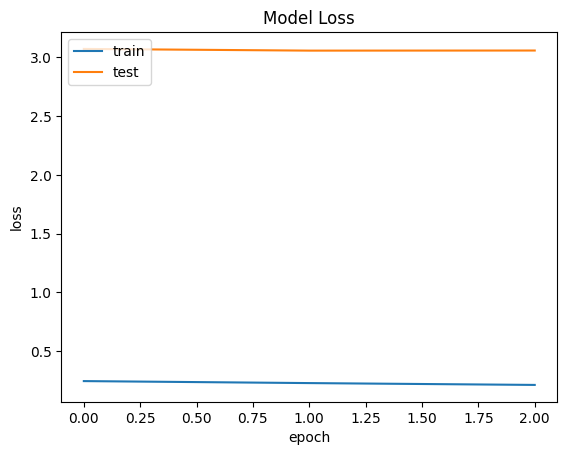

In [75]:
import matplotlib.pyplot as plt
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
encoder_model = Model(encoder_inputs, encoder_states)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.load_weights('seq2seq_eng-Hin.h5')

In [77]:

decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [78]:

decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [79]:

decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)


In [80]:

decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)


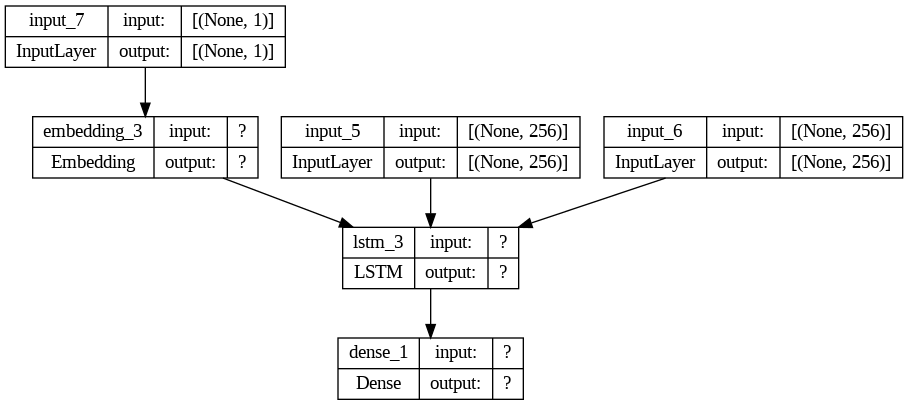

In [81]:

from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [82]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['']
    eos = word2idx_outputs['']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [97]:

i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('Input Language : ', input_sentences[i])
print('Actual translation : ', output_sentences[i])


1/1 [==============================] - 0s 38ms/step
Input Language :  The monkey climbed up a tree.
Actual translation :  बंदर पेड़ पर चढ़ा। 
